In [56]:
from sympy import *

# Exercise 1

In [126]:
x, x_0, a_1, a_2 = symbols("x, x_0, a_1, a_2")
alpha_1, alpha_2 = 1, 2
e = Symbol("varepsilon", bounded=True, positive=True)

expr = x**2 - e*x - 1
x_approx = x_0 + a_1*e + a_2*e**2

x_1, x_2 = solve(expr.subs(e, 0))

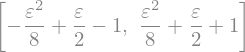

In [127]:
expr_subbed = (expr.subs(x, x_0 + a_1*e**alpha_1 + a_2*e**alpha_2) + O(e**3)).expand().removeO() 
solutions = [
    x_approx.subs(
        solve_undetermined_coeffs(
            expr_subbed.subs(x_0, x00),
            (a_1, a_2), 
            e,
        )
    ).subs(x_0, x00)
    for x00 in [x_1, x_2]
]

solutions 

# Exercise 2

In [160]:
x, x_0, a, alpha = symbols("x, x_0, a, alpha")
e = Symbol("varepsilon", positive=True, bounded=True)

expr = x**3 - (4-e)*x + 2*e
x_approx = x_0 + a*e**alpha

x_1, x_2, x_3 = solve(expr.subs(e, 0))
expr_subbed = expr.subs(x, x_approx)

In [162]:
expr_subbed.subs(x_0, x_1).expand()

In [155]:
alpha_solved = 1
a_solved = solve((expr_subbed.subs(x_0, x_1).subs(alpha, alpha_solved).expand() + O(e**2)).removeO().coeff(e))[0]
x_approx.subs({x_0: x_2, a: a_solved, alpha: alpha_solved})